# 

In [1]:
import pandas as pd
import glob
import os

# Folder path
folder_path = r"C:\Users\samkl"

# Grab all the files with Wave Access in the name 
files = glob.glob(os.path.join(folder_path, "*WAVES-ACCESS-RECORDS*.csv"))

# Read, fix dtypes, and combine
WhiteHouse = pd.concat(
    [
        pd.read_csv(
            file,
            dtype=str,          
            low_memory=False    
        ).assign(source_file=os.path.basename(file))
        for file in files
    ],
    ignore_index=True
)

#Check file 
WhiteHouse.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1207458 entries, 0 to 1207457
Data columns (total 32 columns):
 #   Column                   Non-Null Count    Dtype 
---  ------                   --------------    ----- 
 0   Last Name                1207385 non-null  object
 1   First Name               1207448 non-null  object
 2   Middle Initial           1206944 non-null  object
 3   UIN                      1206944 non-null  object
 4   BDGNBR                   173716 non-null   object
 5   Access Type              1207458 non-null  object
 6   TOA                      844689 non-null   object
 7   POA                      20916 non-null    object
 8   TOD                      12820 non-null    object
 9   POD                      124359 non-null   object
 10  Appointment Made Date    1207455 non-null  object
 11  Appointment Start Date   1207458 non-null  object
 12  Appointment End Date     1207458 non-null  object
 13  Appointment Cancel Date  815 non-null      object
 14  To

In [2]:
import pandas as pd

# List of all columns (excluding your helper)
cols = [c for c in WhiteHouse.columns if c != "source_file"]

# Build a presence matrix: rows=files, cols=column names, values=True/False
presence = (
    pd.DataFrame({"source_file": WhiteHouse["source_file"]})
    .assign(dummy=1)
    .groupby("source_file")["dummy"]
    .size()
    .to_frame("row_count")
)

# For each file, compute which columns are non-null at least once
file_col_presence = (
    WhiteHouse.groupby("source_file")[cols]
    .apply(lambda df: df.notna().any(axis=0))
)

# Combine counts + presence
summary = presence.join(file_col_presence)

# Save to Excel so you can filter/sort and manually inspect and change the files that need to have their column names match the majority (5 files) 
summary.to_excel("whitehouse_column_presence_by_file.xlsx")

print("Saved: whitehouse_column_presence_by_file.xlsx")
summary.head()


Saved: whitehouse_column_presence_by_file.xlsx


,row_count,Last Name,First Name,Middle Initial,UIN,BDGNBR,Access Type,TOA,POA,TOD,...,Meeting Location,Meeting Room,Caller Last Name,Caller First Name,Caller Room,Release Date,Unnamed: 27,Unnamed: 28,CALLER_ROOM,RELEASEDATE
source_file,,,,,,,,,,,,,,,,,,,,,
2021_WAVES-ACCESS-RECORDS White House.csv,41412,True,True,True,True,True,True,True,True,True,...,True,True,True,True,False,True,False,False,False,False
2022.01_WAVES-ACCESS-RECORDS.csv,1185,True,True,True,True,True,True,True,True,True,...,True,True,True,True,False,True,False,False,False,False
2022.02_WAVES-ACCESS-RECORDS.csv,2155,True,True,True,True,True,True,True,True,True,...,True,True,True,True,False,True,False,False,False,False
2022.03_WAVES-ACCESS-RECORDS-.csv,6065,True,True,True,True,True,True,True,True,False,...,True,True,True,True,False,True,True,True,False,False
2022.04_WAVES-ACCESS-RECORDS.csv,13524,True,True,True,True,True,True,True,False,False,...,True,True,True,True,False,True,False,False,False,False


In [3]:
# Identify unnamed columns
unnamed_cols = [c for c in WhiteHouse.columns if str(c).startswith("Unnamed")]

for col in unnamed_cols:
    print(f"\n===== Inspecting {col} =====")

    # Find rows where this column has data
    bad_rows = WhiteHouse[WhiteHouse[col].notna()]

    print(f"Rows with data in {col}: {len(bad_rows)}")

    # Show sample rows and their source file
    display(
        bad_rows[
            ["source_file", col]
        ].head(10)
    )





===== Inspecting Unnamed: 27 =====
Rows with data in Unnamed: 27: 381


,source_file,Unnamed: 27
50436,2022.03_WAVES-ACCESS-RECORDS-.csv,RL
50437,2022.03_WAVES-ACCESS-RECORDS-.csv,RL
50438,2022.03_WAVES-ACCESS-RECORDS-.csv,RL
50439,2022.03_WAVES-ACCESS-RECORDS-.csv,RL
50440,2022.03_WAVES-ACCESS-RECORDS-.csv,RL
50441,2022.03_WAVES-ACCESS-RECORDS-.csv,RL
50442,2022.03_WAVES-ACCESS-RECORDS-.csv,RL
50443,2022.03_WAVES-ACCESS-RECORDS-.csv,RL
50444,2022.03_WAVES-ACCESS-RECORDS-.csv,RL
50445,2022.03_WAVES-ACCESS-RECORDS-.csv,FPG



===== Inspecting Unnamed: 28 =====
Rows with data in Unnamed: 28: 378


,source_file,Unnamed: 28
50436,2022.03_WAVES-ACCESS-RECORDS-.csv,ashley.n.grove@whmo.mil
50437,2022.03_WAVES-ACCESS-RECORDS-.csv,david.w.nelson@ovp.eop.gov
50438,2022.03_WAVES-ACCESS-RECORDS-.csv,david.w.nelson@ovp.eop.gov
50439,2022.03_WAVES-ACCESS-RECORDS-.csv,david.w.nelson@ovp.eop.gov
50440,2022.03_WAVES-ACCESS-RECORDS-.csv,david.w.nelson@ovp.eop.gov
50441,2022.03_WAVES-ACCESS-RECORDS-.csv,david.w.nelson@ovp.eop.gov
50442,2022.03_WAVES-ACCESS-RECORDS-.csv,david.w.nelson@ovp.eop.gov
50443,2022.03_WAVES-ACCESS-RECORDS-.csv,david.w.nelson@ovp.eop.gov
50444,2022.03_WAVES-ACCESS-RECORDS-.csv,david.w.nelson@ovp.eop.gov
50445,2022.03_WAVES-ACCESS-RECORDS-.csv,david.w.nelson@ovp.eop.gov


In [4]:
#drop unnamed columns 
if unnamed_cols:
    WhiteHouse.drop(columns=unnamed_cols, inplace=True)
    print(f"\n🗑️ Dropped unnamed columns: {unnamed_cols}")
else:
    print("\nNo unnamed columns to drop.")



🗑️ Dropped unnamed columns: ['Unnamed: 27', 'Unnamed: 28']


In [5]:
list(WhiteHouse.columns)

['Last Name',
 'First Name',
 'Middle Initial',
 'UIN',
 'BDGNBR',
 'Access Type',
 'TOA',
 'POA',
 'TOD',
 'POD',
 'Appointment Made Date',
 'Appointment Start Date',
 'Appointment End Date',
 'Appointment Cancel Date',
 'Total People',
 'Last Updated By',
 'POST',
 'Last Entry Date',
 'Terminal Suffix',
 'Visitee Last Name',
 'Visitee First Name',
 'Meeting Location',
 'Meeting Room',
 'Caller Last Name',
 'Caller First Name',
 'Caller Room',
 'Release Date',
 'source_file',
 'CALLER_ROOM',
 'RELEASEDATE']

In [6]:
WhiteHouse["source_file"].unique()
#ensure all my files loaded into the larger df I made

array(['2021_WAVES-ACCESS-RECORDS White House.csv',
       '2022.01_WAVES-ACCESS-RECORDS.csv',
       '2022.02_WAVES-ACCESS-RECORDS.csv',
       '2022.03_WAVES-ACCESS-RECORDS-.csv',
       '2022.04_WAVES-ACCESS-RECORDS.csv',
       '2022.05-WAVES-ACCESS-RECORDS.csv',
       '2022.06_WAVES-ACCESS-RECORDS.csv',
       '2022.07_WAVES-ACCESS-RECORDS.csv',
       '2022.08_WAVES-ACCESS-RECORDS.csv',
       '2022.09_WAVES-ACCESS-RECORDS.csv',
       '2022.10_WAVES-ACCESS-RECORDS.csv',
       '2022.11_WAVES-ACCESS-RECORDS.csv',
       '2022.12_WAVES-ACCESS-RECORDS.csv',
       '2023.01_WAVES-ACCESS-RECORDS.csv',
       '2023.02_WAVES-ACCESS-RECORDS.csv',
       '2023.03_WAVES-ACCESS-RECORDS.csv',
       '2023.04_WAVES-ACCESS-RECORDS.csv',
       '2023.05_WAVES-ACCESS-RECORDS.csv',
       '2023.06_WAVES-ACCESS-RECORDS.csv',
       '2023.07_WAVES-ACCESS-RECORDS.csv',
       '2023.08_WAVES-ACCESS-RECORDS.csv',
       '2023.09_WAVES-ACCESS-RECORDS.csv',
       '2023.10_WAVES-ACCESS-RECORDS.csv',
 

In [7]:
WhiteHouse.head()

,Last Name,First Name,Middle Initial,UIN,BDGNBR,Access Type,TOA,POA,TOD,POD,...,Visitee First Name,Meeting Location,Meeting Room,Caller Last Name,Caller First Name,Caller Room,Release Date,source_file,CALLER_ROOM,RELEASEDATE
0,AAKHUU,BOLORMAA,N,U38116,NaN,VA,NaN,NaN,NaN,NaN,...,Visitors,WH,EW TOUR,SCHWARTZ,PEYTON,NaN,4/13/2022,2021_WAVES-ACCESS-RECORDS White House.csv,NaN,NaN
1,AASSAR,MIA,L,U37794,NaN,VA,12/17/2021 12:23,NaN,NaN,NaN,...,Visitors,WH,EW - RES,SCHWARTZ,PEYTON,NaN,4/13/2022,2021_WAVES-ACCESS-RECORDS White House.csv,NaN,NaN
2,ABALOS,JANILA,L,U38186,NaN,VA,NaN,NaN,NaN,NaN,...,KATIE,WH,EW TOUR,COLE,KATIE,NaN,4/13/2022,2021_WAVES-ACCESS-RECORDS White House.csv,NaN,NaN
3,ABARCAR,KARA,N,U37879,NaN,VA,12/19/2021 17:25,NaN,NaN,NaN,...,Visitors,WH,EW TOUR,COLE,KATIE,NaN,4/13/2022,2021_WAVES-ACCESS-RECORDS White House.csv,NaN,NaN
4,ABBOTT,NICOLAS,P,U36630,NaN,VA,NaN,NaN,NaN,NaN,...,Ian,OEOB,SCA,GIAMMARELLA,ALYSSA,NaN,4/13/2022,2021_WAVES-ACCESS-RECORDS White House.csv,NaN,NaN


In [8]:
WhiteHouse.dtypes

Last Name                  object
First Name                 object
Middle Initial             object
UIN                        object
BDGNBR                     object
Access Type                object
TOA                        object
POA                        object
TOD                        object
POD                        object
Appointment Made Date      object
Appointment Start Date     object
Appointment End Date       object
Appointment Cancel Date    object
Total People               object
Last Updated By            object
POST                       object
Last Entry Date            object
Terminal Suffix            object
Visitee Last Name          object
Visitee First Name         object
Meeting Location           object
Meeting Room               object
Caller Last Name           object
Caller First Name          object
Caller Room                object
Release Date               object
source_file                object
CALLER_ROOM                object
RELEASEDATE   

In [9]:
# --- RAW missingness check for Appointment Start Date (BEFORE any parsing/coalescing) ---

import pandas as pd

total_rows = len(WhiteHouse)

# True nulls (NaN)
null_count = WhiteHouse["Appointment Start Date"].isna().sum()

# Blank / whitespace-only values
blank_count = (
    WhiteHouse["Appointment Start Date"]
    .astype(str)
    .str.strip()
    .eq("")
    .sum()
)

# Combined missing (null OR blank)
missing_mask = (
    WhiteHouse["Appointment Start Date"].isna()
    | WhiteHouse["Appointment Start Date"].astype(str).str.strip().eq("")
)

print("TOTAL ROWS:", total_rows)
print("NULL COUNT:", null_count)
print("BLANK COUNT:", blank_count)
print("TOTAL MISSING (NULL + BLANK):", missing_mask.sum())
print("MISSING PERCENT:", round(missing_mask.mean() * 100, 2), "%")

# Optional: missingness by source file (to see if 2023 differs)
print("\nMissing % by source_file:")
print(
    WhiteHouse.assign(is_missing_start_date=missing_mask)
    .groupby("source_file")["is_missing_start_date"]
    .mean()
    .mul(100)
    .round(2)
    .sort_values(ascending=False)
)


TOTAL ROWS: 1207458
NULL COUNT: 0
BLANK COUNT: 0
TOTAL MISSING (NULL + BLANK): 0
MISSING PERCENT: 0.0 %

Missing % by source_file:
source_file
2021_WAVES-ACCESS-RECORDS White House.csv    0.0
2022.01_WAVES-ACCESS-RECORDS.csv             0.0
2022.02_WAVES-ACCESS-RECORDS.csv             0.0
2022.03_WAVES-ACCESS-RECORDS-.csv            0.0
2022.04_WAVES-ACCESS-RECORDS.csv             0.0
2022.05-WAVES-ACCESS-RECORDS.csv             0.0
2022.06_WAVES-ACCESS-RECORDS.csv             0.0
2022.07_WAVES-ACCESS-RECORDS.csv             0.0
2022.08_WAVES-ACCESS-RECORDS.csv             0.0
2022.09_WAVES-ACCESS-RECORDS.csv             0.0
2022.10_WAVES-ACCESS-RECORDS.csv             0.0
2022.11_WAVES-ACCESS-RECORDS.csv             0.0
2022.12_WAVES-ACCESS-RECORDS.csv             0.0
2023.01_WAVES-ACCESS-RECORDS.csv             0.0
2023.02_WAVES-ACCESS-RECORDS.csv             0.0
2023.03_WAVES-ACCESS-RECORDS.csv             0.0
2023.04_WAVES-ACCESS-RECORDS.csv             0.0
2023.05_WAVES-ACCESS-REC

In [10]:
import pandas as pd

col = "Appointment Start Date"

# 1) Clean invisible/control characters that break parsing but don't show in prints
s = (WhiteHouse[col].astype(str)
     .str.replace("\u00A0", " ", regex=False)                      # NBSP
     .str.replace(r"[\u200B-\u200F\u202A-\u202E\u2060\uFEFF]", "", regex=True)  # zero-width/BOM/etc
     .str.replace("\x00", "", regex=False)                         # null byte
     .str.strip()
)

# 2) Parse with explicit formats first (fast + reliable)
parsed = pd.to_datetime(s, format="%m/%d/%Y %H:%M", errors="coerce")

# 3) Fallback: sometimes seconds appear
mask = parsed.isna()
if mask.any():
    parsed.loc[mask] = pd.to_datetime(s.loc[mask], format="%m/%d/%Y %H:%M:%S", errors="coerce")

# 4) Final fallback: let pandas/dateutil try remaining oddballs
mask = parsed.isna()
if mask.any():
    parsed.loc[mask] = pd.to_datetime(s.loc[mask], errors="coerce")

# 5) Assign back IN PLACE
WhiteHouse[col] = parsed

# 6) Quick proof
print("NaT count after parse:", int(WhiteHouse[col].isna().sum()))
print("Max parsed date:", WhiteHouse[col].max())
print("Year counts:")
print(WhiteHouse[col].dt.year.value_counts(dropna=False).sort_index())


NaT count after parse: 0
Max parsed date: 2023-12-31 10:00:00
Year counts:
Appointment Start Date
2021     41412
2022    322830
2023    843216
Name: count, dtype: int64


In [11]:
import pandas as pd

# Date columns to validate
date_cols = [
    "Appointment Made Date",
    "Appointment Start Date",
    "Appointment End Date",
    "Appointment Cancel Date",
    "Last Entry Date",
    "Release Date",
]

# Keep only columns that exist
date_cols = [c for c in date_cols if c in WhiteHouse.columns]

# Force datetime conversion (this fixes the error)
for col in date_cols:
    WhiteHouse[col] = pd.to_datetime(WhiteHouse[col], errors="coerce")

# Year-range bounds
CURRENT_YEAR = 2025
MIN_YEAR = 2021

# Completeness + year checks
date_summary = pd.DataFrame({
    "MISSING_COUNT": WhiteHouse[date_cols].isna().sum(),
    "MISSING_PCT": (WhiteHouse[date_cols].isna().mean() * 100).round(2),
    "MIN_YEAR": WhiteHouse[date_cols].apply(lambda s: s.dt.year.min()),
    "MAX_YEAR": WhiteHouse[date_cols].apply(lambda s: s.dt.year.max()),
}, index=date_cols)

# Out-of-range year counts
date_summary["OUT_OF_RANGE_COUNT"] = [
    (
        WhiteHouse[col].notna()
        & (
            (WhiteHouse[col].dt.year < MIN_YEAR)
            | (WhiteHouse[col].dt.year > CURRENT_YEAR)
        )
    ).sum()
    for col in date_cols
]

print("=== DATE SUMMARY (date boundaries) ===")
print(date_summary.sort_values("MISSING_PCT", ascending=False).to_string())


=== DATE SUMMARY (date boundaries) ===
                         MISSING_COUNT  MISSING_PCT  MIN_YEAR  MAX_YEAR  OUT_OF_RANGE_COUNT
Appointment Cancel Date        1206646        99.93    1900.0    2023.0                  12
Release Date                    360140        29.83    2021.0    2024.0                   0
Last Entry Date                   7280         0.60    2021.0    2023.0                   0
Appointment Made Date                3         0.00    2021.0    2023.0                   0
Appointment Start Date               0         0.00    2021.0    2023.0                   0
Appointment End Date                 0         0.00    2021.0    2023.0                   0


In [12]:
#evaluted the files at the source and all those are data entry errors, removing them 

mask_cancel_oor = (
    WhiteHouse["Appointment Cancel Date"].notna()
    & (
        (WhiteHouse["Appointment Cancel Date"].dt.year < MIN_YEAR)
        | (WhiteHouse["Appointment Cancel Date"].dt.year > CURRENT_YEAR)
    )
)

print("Out-of-range Appointment Cancel Date rows:", mask_cancel_oor.sum())

# Clear the bad values (keep rows)
WhiteHouse.loc[mask_cancel_oor, "Appointment Cancel Date"] = pd.NA
WhiteHouse.loc[mask_cancel_oor, "Appointment Cancel Date"] = pd.NaT


Out-of-range Appointment Cancel Date rows: 12


In [13]:
WhiteHouse["booking_lead_time_days"] = (
    WhiteHouse["Appointment Start Date"] - WhiteHouse["Appointment Made Date"]
).dt.days
#calculate how long it takes from booking to your appointment

In [14]:
#look at Cancelled appointments 
WhiteHouse["was_cancelled"] = WhiteHouse["Appointment Cancel Date"].notna()
cancelled_count = WhiteHouse["was_cancelled"].sum()
total_appointments = len(WhiteHouse)
cancelled_pct = (cancelled_count / total_appointments) * 100

print(f"Cancelled appointments: {cancelled_count}")
print(f"Total appointments: {total_appointments}")
print(f"Percent cancelled: {cancelled_pct:.4f}%")

Cancelled appointments: 800
Total appointments: 1207458
Percent cancelled: 0.0663%


Fewer than 0.1% of appointments contained a cancellation record, indicating that cancellation data are sparse and were not analyzed further.

In [15]:
WhiteHouse["booking_lead_time_days"].describe()


count    1.207455e+06
mean     4.080757e+00
std      4.167098e+00
min     -9.100000e+01
25%      1.000000e+00
50%      2.000000e+00
75%      7.000000e+00
max      3.200000e+01
Name: booking_lead_time_days, dtype: float64

In [16]:
WhiteHouse.loc[
    WhiteHouse["booking_lead_time_days"] < 0,
    "booking_lead_time_days"
] = pd.NA


In [17]:
WhiteHouse["booking_lead_time_days"].describe()
#clean up negatives due to rounding 

count    1.188490e+06
mean     4.166300e+00
std      4.095736e+00
min      0.000000e+00
25%      1.000000e+00
50%      3.000000e+00
75%      7.000000e+00
max      3.200000e+01
Name: booking_lead_time_days, dtype: float64

In [18]:
#create visitor and vistiee full name columns for analysis 

WhiteHouse["visitor_full_name"] = (
    WhiteHouse["First Name"].fillna("") + " " +
    WhiteHouse["Middle Initial"].fillna("") + " " +
    WhiteHouse["Last Name"].fillna("")
).str.replace(r"\s+", " ", regex=True).str.strip()

WhiteHouse["visitee_full_name"] = (
    WhiteHouse["Visitee First Name"].fillna("") + " " +
    WhiteHouse["Visitee Last Name"].fillna("")
).str.replace(r"\s+", " ", regex=True).str.strip()

# Replace empty strings with NA (no chained assignment)
WhiteHouse["visitor_full_name"] = WhiteHouse["visitor_full_name"].replace("", pd.NA)
WhiteHouse["visitee_full_name"] = WhiteHouse["visitee_full_name"].replace("", pd.NA)


In [19]:
#See who was a repeat visitor (same person) 

# Group visitor -> visitee and count visits
visit_counts = (
    WhiteHouse
    .dropna(subset=["visitor_full_name", "visitee_full_name"])
    .groupby(["visitor_full_name", "visitee_full_name"])
    .size()
    .reset_index(name="visit_count")
)

# Sort by most frequent repeat visits
visit_counts_sorted = visit_counts.sort_values(
    "visit_count", ascending=False
)

# Show top 25 repeat visitor-visitee pairs
visit_counts_sorted.head(25)


,visitor_full_name,visitee_full_name,visit_count
324785,FERN E SATO,Dan Via,97
130737,BRIAN C TURNMIRE,Dan Via,83
831025,RUSSELL A WILSON,Dan Via,79
19724,ALAN C PRATHER,Dan Via,77
189926,CHRISTOPHER E SCHMITT,Dan Via,77
859,AARON D CLAY,Dan Via,65
328643,FRANCIS C SHIEH,Dan Via,64
939370,TIFFANY J RAMSEYER,Craig Guyton,63
414190,JAMES W LEVINGS,Kolakowski,63
304933,ERIC D SABO,Dan Via,60


In [20]:
# Count how many visits each visitee received
visitee_counts = (
    WhiteHouse
    .dropna(subset=["visitee_full_name"])
    .groupby("visitee_full_name")
    .size()
    .reset_index(name="visit_count")
    .sort_values("visit_count", ascending=False)
)

# Show top 25 visitees by number of visits
visitee_counts.head(25)


,visitee_full_name,visit_count
6437,Visitors Office,698518
4997,POTUS,96274
1964,Ed Teleky,20733
6354,VPOTUS,11649
2359,Gionelly Mills,10625
1552,Dan Via,7158
334,Amanda Trocola,6607
4014,Lydia Hecmanczuk,6036
2343,Gianna Juarez,5615
3618,Kevin Ballen,4914


#sorted(
    WhiteHouse["Meeting Room"]
    .dropna()
    .astype(str)
    .str.strip()
    .unique()
)


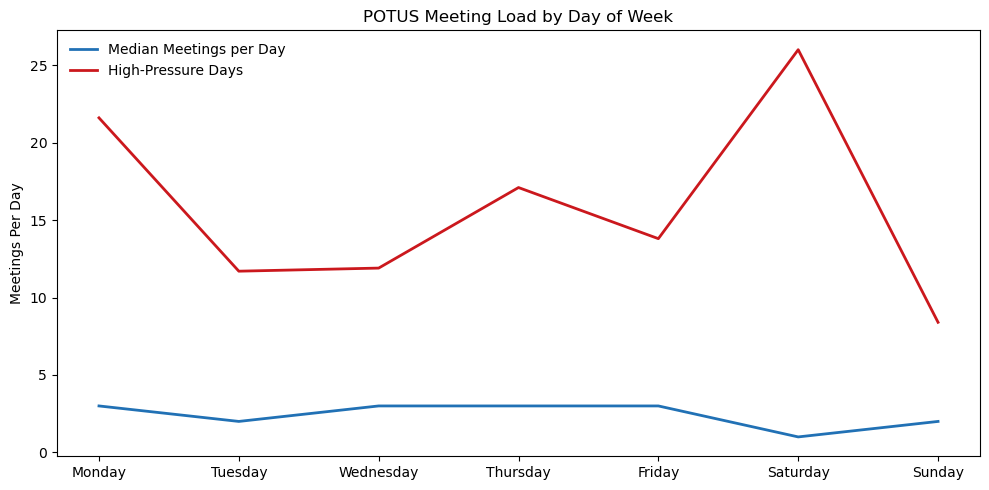

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1) Filter to POTUS only ---
potus = WhiteHouse.loc[
    WhiteHouse["visitee_full_name"].astype(str).str.strip().str.upper() == "POTUS"
].copy()

# --- 2) Convert required columns ---
potus["Appointment Start Date"] = pd.to_datetime(
    potus["Appointment Start Date"], errors="coerce"
)

# --- 3) Drop rows missing meeting-defining info ---
potus = potus.dropna(
    subset=["Appointment Start Date", "Meeting Location", "Meeting Room"]
)

# --- 4) Deduplicate to ONE row per meeting ---
meetings = potus.drop_duplicates(
    subset=[
        "Appointment Start Date",
        "Appointment End Date",
        "Meeting Location",
        "Meeting Room"
    ]
)

# --- 5) Count meetings per DAY ---
daily_counts = (
    meetings
    .assign(
        day=meetings["Appointment Start Date"].dt.normalize(),
        weekday=meetings["Appointment Start Date"].dt.day_name()
    )
    .groupby(["day", "weekday"])
    .size()
    .rename("meetings_per_day")
    .reset_index()
)

# --- 6) Aggregate by weekday ---
weekday_stats = (
    daily_counts
    .groupby("weekday")["meetings_per_day"]
    .agg(
        median="median",
        p90=lambda x: x.quantile(0.90)
    )
)

# Ensure correct weekday order
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_stats = weekday_stats.reindex(weekday_order).dropna()

# --- 7) Plot ---
plt.figure(figsize=(10, 5))

plt.plot(
    weekday_stats.index,
    weekday_stats["median"],
    marker="",
    linewidth=2,
    color="#2171b5",
    label="Median Meetings per Day"
)

plt.plot(
    weekday_stats.index,
    weekday_stats["p90"],
    marker="",
    linewidth=2,
    color="#cb181d",
    label="High-Pressure Days"
)

plt.title("POTUS Meeting Load by Day of Week")
plt.xlabel("")
plt.ylabel("Meetings Per Day")
plt.legend(frameon=False)

plt.tight_layout()
plt.show()


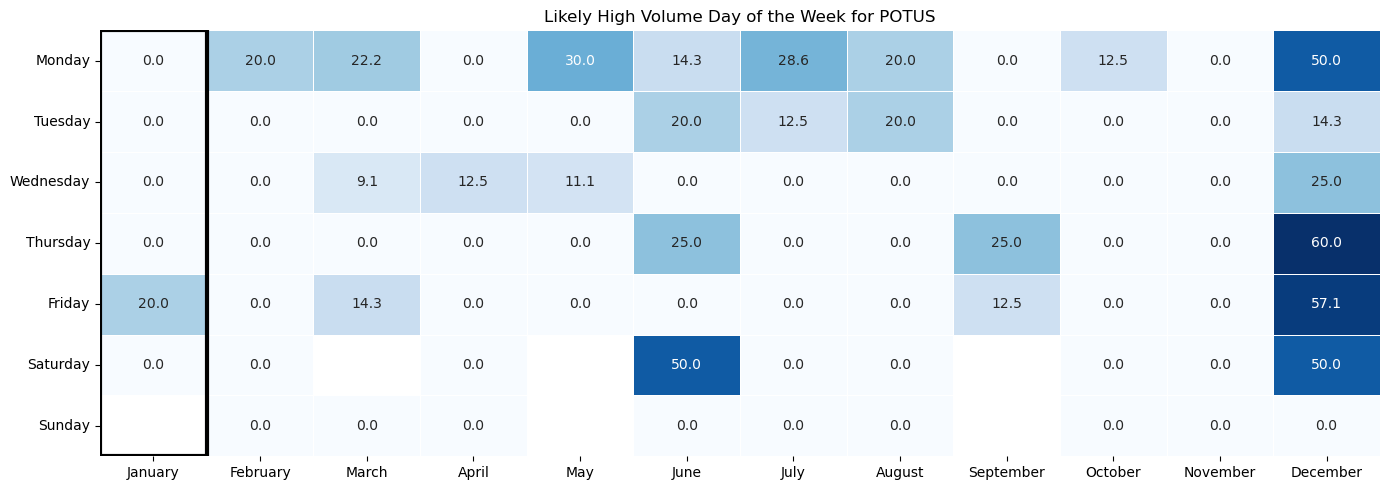

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle

# --- 1) Filter to POTUS only ---
potus = WhiteHouse.loc[
    WhiteHouse["visitee_full_name"].astype(str).str.strip().str.upper() == "POTUS"
].copy()

# --- 2) Convert date ---
potus["Appointment Start Date"] = pd.to_datetime(
    potus["Appointment Start Date"], errors="coerce"
)

# --- 3) Drop rows missing meeting-defining info ---
potus = potus.dropna(
    subset=["Appointment Start Date", "Meeting Location", "Meeting Room"]
)

# --- 4) Deduplicate to ONE row per meeting ---
meetings = potus.drop_duplicates(
    subset=[
        "Appointment Start Date",
        "Appointment End Date",
        "Meeting Location",
        "Meeting Room"
    ]
)

# --- 5) Count meetings per day ---
daily = (
    meetings
    .assign(
        day=meetings["Appointment Start Date"].dt.normalize(),
        weekday=meetings["Appointment Start Date"].dt.day_name(),
        month=meetings["Appointment Start Date"].dt.month_name()
    )
    .groupby(["day", "weekday", "month"])
    .size()
    .rename("meetings_per_day")
    .reset_index()
)

# --- 6) High-pressure threshold (90th percentile) ---
p90_threshold = daily["meetings_per_day"].quantile(0.90)
daily["is_high_pressure"] = daily["meetings_per_day"] >= p90_threshold

# --- 7) % of high-pressure days by Month × Weekday ---
risk = (
    daily
    .groupby(["month", "weekday"])["is_high_pressure"]
    .mean()
    .mul(100)
    .reset_index(name="pct_high_pressure")
)

month_order = [
    "January","February","March","April","May","June",
    "July","August","September","October","November","December"
]
weekday_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

risk["month"] = pd.Categorical(risk["month"], month_order, ordered=True)
risk["weekday"] = pd.Categorical(risk["weekday"], weekday_order, ordered=True)

pivot = risk.pivot(index="weekday", columns="month", values="pct_high_pressure")

# --- 8) Plot heatmap (NO colorbar) ---
plt.figure(figsize=(14, 5))
ax = sns.heatmap(
    pivot,
    cmap="Blues",
    annot=True,
    fmt=".1f",
    linewidths=0.5,
    cbar=False   # <-- removes legend
)

# --- 9) Highlight January column ---
jan_col_index = pivot.columns.get_loc("January")

rect = Rectangle(
    (jan_col_index, 0),
    width=1,
    height=pivot.shape[0],
    fill=False,
    edgecolor="black",
    linewidth=3
)

ax.add_patch(rect)

plt.title("Likely High Volume Day of the Week for POTUS")
plt.xlabel("")
plt.ylabel("")
plt.tight_layout()
plt.show()


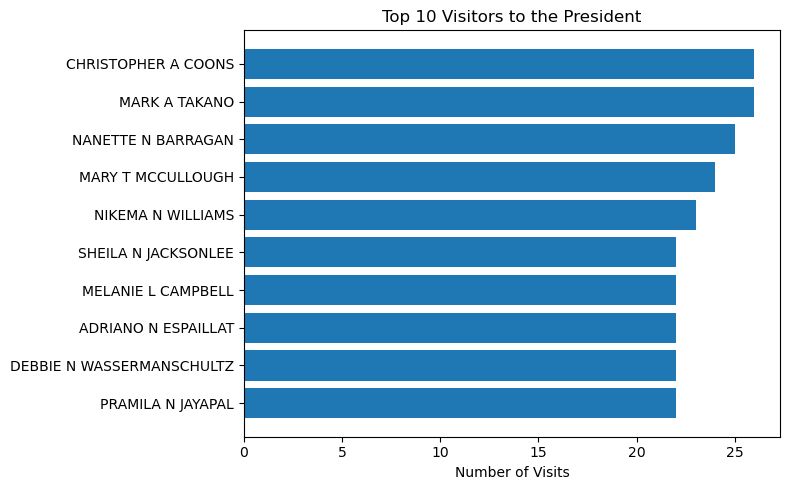

In [23]:
# Filter to POTUS appointments only
potus_visits = (
    WhiteHouse
    .dropna(subset=["visitee_full_name", "visitor_full_name"])
    .loc[WhiteHouse["visitee_full_name"] == "POTUS"]
)

# Count visits per visitor
top_10_visitors = (
    potus_visits["visitor_full_name"]
    .value_counts()
    .head(10)
    .reset_index()
)

top_10_visitors.columns = ["Visitor", "Number of Visits"]

top_10_visitors


import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.barh(
    top_10_visitors["Visitor"],
    top_10_visitors["Number of Visits"],
    color="#1f77b4"
)

plt.title("Top 10 Visitors to the President")
plt.xlabel("Number of Visits")
plt.ylabel("")

plt.gca().invert_yaxis()  # highest at top
plt.tight_layout()
plt.show()


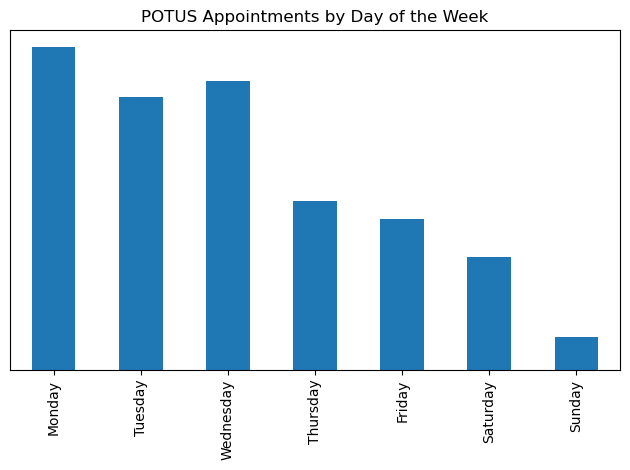

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Prepare data (POTUS ONLY)
dow_data = (
    WhiteHouse
    .loc[WhiteHouse["visitee_full_name"] == "POTUS"]
    .dropna(subset=["Appointment Start Date"])
    .assign(day_of_week=lambda df: df["Appointment Start Date"].dt.day_name())
)

day_order = [
    "Monday", "Tuesday", "Wednesday",
    "Thursday", "Friday", "Saturday", "Sunday"
]

dow_counts = (
    dow_data["day_of_week"]
    .value_counts()
    .reindex(day_order)
)

# Plot
plt.figure()
ax = dow_counts.plot(kind="bar")

plt.title("POTUS Appointments by Day of the Week")
plt.xlabel("")
plt.ylabel("")

# Remove ALL y-axis elements
ax.set_yticks([])
ax.yaxis.set_visible(False)

plt.tight_layout()
plt.show()


In [25]:
# --- Filter POTUS visits only ---
potus_visits = (
    WhiteHouse
    .dropna(subset=["visitee_full_name", "visitor_full_name"])
    .loc[WhiteHouse["visitee_full_name"] == "POTUS"]
)

# --- Manual role classification (transparent + auditable) ---
role_map = {
    "CHRISTOPHER A COONS": "Congress",
    "MARK A TAKANO": "Congress",
    "NANETTE N BARRAGAN": "Congress",
    "PRAMILA N JAYAPAL": "Congress",
    "NIKEMA N WILLIAMS": "Congress",
    "DEBBIE N WASSERMANSCHULTZ": "Congress",
    "SHEILA N JACKSONLEE": "Congress",
    "ADRIANO N ESPAILLAT": "Congress",

    "MARY T MCCULLOUGH": "Executive Branch",
    "MELANIE L CAMPBELL": "Political Party Leadership",
}

# --- Apply roles ---
potus_visits["visitor_role"] = (
    potus_visits["visitor_full_name"]
    .map(role_map)
    .fillna("Other / Unknown")
)

# --- Aggregate by role ---
role_counts = (
    potus_visits
    .groupby("visitor_role")
    .size()
    .sort_values(ascending=False)
    .reset_index(name="Number of Visits")
)

role_counts


,visitor_role,Number of Visits
0,Other / Unknown,96040
1,Congress,188
2,Executive Branch,24
3,Political Party Leadership,22


C:\Users\samkl\AppData\Local\Temp\ipykernel_45680\2242003769.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby([pd.Grouper(key="Appointment Start Date", freq="ME"), "meeting_size"])


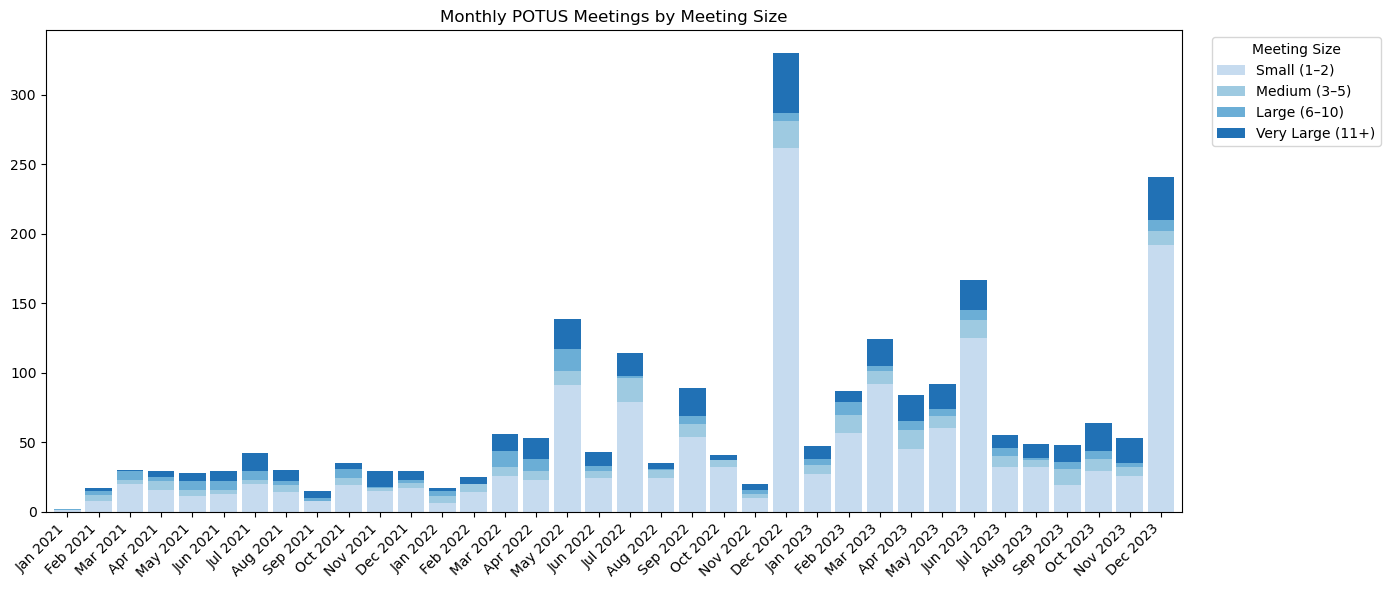

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1) Filter to POTUS meetings ONLY ---
potus = WhiteHouse.loc[
    WhiteHouse["visitee_full_name"] == "POTUS"
].copy()

# --- 2) Convert required columns ---
potus["Appointment Start Date"] = pd.to_datetime(potus["Appointment Start Date"], errors="coerce")
potus["Appointment End Date"]   = pd.to_datetime(potus["Appointment End Date"], errors="coerce")
potus["Total People"] = pd.to_numeric(potus["Total People"], errors="coerce")

# --- 3) Drop rows missing meeting-defining info (needed for dedupe) ---
potus = potus.dropna(subset=["Appointment Start Date", "Meeting Location", "Meeting Room"])

# --- 4) Define meeting size buckets ---
potus["meeting_size"] = pd.cut(
    potus["Total People"],
    bins=[0, 2, 5, 10, float("inf")],
    labels=["Small (1–2)", "Medium (3–5)", "Large (6–10)", "Very Large (11+)"],
    right=True
)

# --- 5) Deduplicate to ONE row per meeting ---
# (This prevents counting one meeting many times due to multiple attendee rows.)
meetings = potus.drop_duplicates(
    subset=["Appointment Start Date", "Appointment End Date", "Meeting Location", "Meeting Room"]
)

# --- 6) Aggregate monthly meeting counts by size ---
monthly = (
    meetings
    .groupby([pd.Grouper(key="Appointment Start Date", freq="ME"), "meeting_size"])
    .size()
    .unstack(fill_value=0)
)

# Ensure consistent stack order
size_order = ["Small (1–2)", "Medium (3–5)", "Large (6–10)", "Very Large (11+)"]
monthly = monthly.reindex(columns=size_order).fillna(0)

# --- 7) FIX THE 1970 X-AXIS PROBLEM FOR BAR CHARTS ---
# Bar charts treat the x-axis as categories; convert datetime index to readable strings.
monthly.index = monthly.index.strftime("%b %Y")

# --- 8) Plot stacked bars (blue hues) ---
colors = [
    "#c6dbef",  # Small (1–2)
    "#9ecae1",  # Medium (3–5)
    "#6baed6",  # Large (6–10)
    "#2171b5"   # Very Large (11+)
]

ax = monthly.plot(kind="bar", stacked=True, figsize=(14, 6), color=colors, width=0.85)

plt.title("Monthly POTUS Meetings by Meeting Size")
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Meeting Size", bbox_to_anchor=(1.02, 1), loc="upper left")



plt.tight_layout()
plt.show()


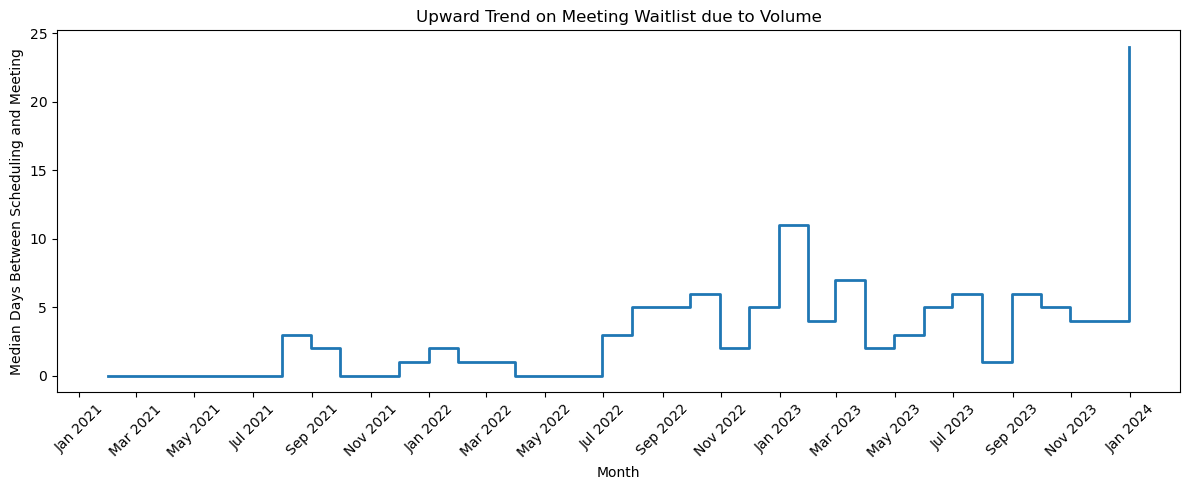

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Build plotting-only dataframe
plot_df = WhiteHouse[
    ["Appointment Made Date", "Appointment Start Date"]
].copy()

plot_df = WhiteHouse.loc[
    WhiteHouse["visitee_full_name"] == "POTUS"
].copy()


# Ensure datetime
plot_df["Appointment Made Date"] = pd.to_datetime(plot_df["Appointment Made Date"], errors="coerce")
plot_df["Appointment Start Date"] = pd.to_datetime(plot_df["Appointment Start Date"], errors="coerce")

# Compute booking lead time (days)
plot_df["booking_lead_time_days"] = (
    plot_df["Appointment Start Date"] - plot_df["Appointment Made Date"]
).dt.days

# Remove invalid values (visualization only)
plot_df = plot_df[
    (plot_df["booking_lead_time_days"] >= 0) &
    (plot_df["booking_lead_time_days"] <= 180)
]

# Aggregate to monthly median (Month-End)
monthly = (
    plot_df
    .set_index("Appointment Start Date")
    .resample("ME")["booking_lead_time_days"]
    .median()
)

# Step chart (single color)
plt.figure(figsize=(12, 5))
plt.step(
    monthly.index,
    monthly.values,
    where="post",
    linewidth=2
)

plt.title("Upward Trend on Meeting Waitlist due to Volume")
plt.xlabel("Month")
plt.ylabel("Median Days Between Scheduling and Meeting")

# Force month labels
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


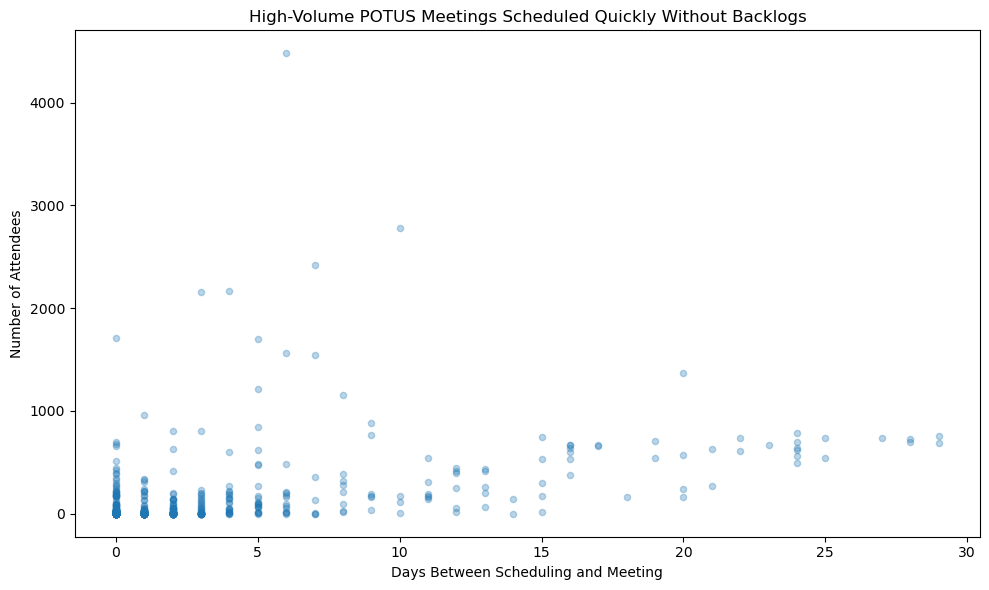

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1) Filter to POTUS meetings only ---
potus = WhiteHouse.loc[
    WhiteHouse["visitee_full_name"] == "POTUS"
].copy()

# --- 2) Convert needed columns ---
potus["Appointment Made Date"] = pd.to_datetime(potus["Appointment Made Date"], errors="coerce")
potus["Appointment Start Date"] = pd.to_datetime(potus["Appointment Start Date"], errors="coerce")
potus["Total People"] = pd.to_numeric(potus["Total People"], errors="coerce")

# --- 3) Drop rows missing essentials ---
potus = potus.dropna(subset=[
    "Appointment Made Date",
    "Appointment Start Date",
    "Total People",
    "Meeting Location",
    "Meeting Room"
])

# --- 4) Calculate booking lead time (days) ---
potus["booking_lead_time_days"] = (
    potus["Appointment Start Date"] - potus["Appointment Made Date"]
).dt.days

# Remove obvious bad values (negative or extreme)
potus = potus.loc[
    (potus["booking_lead_time_days"] >= 0) &
    (potus["booking_lead_time_days"] <= 60)
]

# --- 5) Deduplicate to ONE row per meeting ---
meetings = potus.drop_duplicates(
    subset=[
        "Appointment Start Date",
        "Appointment End Date",
        "Meeting Location",
        "Meeting Room"
    ]
)

# --- 6) Scatterplot ---
plt.figure(figsize=(10, 6))
plt.scatter(
    meetings["booking_lead_time_days"],
    meetings["Total People"],
    alpha=0.3,
    s=20
)

plt.title("High-Volume POTUS Meetings Scheduled Quickly Without Backlogs")
plt.xlabel("Days Between Scheduling and Meeting")
plt.ylabel("Number of Attendees")

plt.tight_layout()
plt.show()
